
# Homes Dataset – EDA and  Linear Regression


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pathlib import Path



## 1) Load the data


In [97]:


df = pd.read_csv("homes.csv")
df.head()


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [99]:
df.tail()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
46,143,145.0,21.0,7.0,4.0,2.0,10.0,1.20,3529.0
47,247,252.0,29.0,9.0,4.0,2.0,4.0,1.25,4626.0
48,111,120.0,15.0,8.0,3.0,1.0,97.0,1.11,3205.0
49,133,145.0,26.0,7.0,3.0,1.0,42.0,0.36,3059.0
50,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df = df.iloc[:-1]
df.tail()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
45,129,135.0,10.0,6.0,3.0,1.0,15.0,1.00,2438.0
46,143,145.0,21.0,7.0,4.0,2.0,10.0,1.20,3529.0
47,247,252.0,29.0,9.0,4.0,2.0,4.0,1.25,4626.0
48,111,120.0,15.0,8.0,3.0,1.0,97.0,1.11,3205.0
49,133,145.0,26.0,7.0,3.0,1.0,42.0,0.36,3059.0



## 2) Describe the dataset
 **shape**, column names, basic **info** (types / non-nulls), and **summary statistics**.


In [105]:

print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nInfo:")
print(df.info())
print("\nDescribe (numeric):")
display(df.describe(include=[np.number]).T)
print("\nDescribe (all):")
display(df.describe(include='all').T)


Shape: (50, 9)

Columns: ['Sell', 'List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres', 'Taxes']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    50 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.6+ KB
None

Describe (numeric):


,count,mean,std,min,25%,50%,75%,max
List,50.0,178.3400,79.382723,90.00,140.0000,160.00,190.0000,625.00
Living,50.0,21.1200,8.351072,10.00,17.0000,20.00,22.7500,64.00
Rooms,50.0,8.0600,1.284285,5.00,7.0000,8.00,9.0000,12.00
Beds,50.0,3.8200,0.690755,3.00,3.0000,4.00,4.0000,6.00
Baths,50.0,1.8600,0.756199,1.00,1.0000,2.00,2.0000,4.00
Age,50.0,30.2200,30.962314,2.00,12.2500,24.50,37.0000,202.00
Acres,50.0,1.0206,1.191496,0.22,0.3825,0.55,1.1825,6.49
Taxes,50.0,3706.1000,1579.915268,1445.00,3107.0000,3490.00,3919.2500,12192.00



Describe (all):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sell,50,42,110,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
List,50.0,NaN,NaN,NaN,178.34,79.382723,90.0,140.0,160.0,190.0,625.0
Living,50.0,NaN,NaN,NaN,21.12,8.351072,10.0,17.0,20.0,22.75,64.0
Rooms,50.0,NaN,NaN,NaN,8.06,1.284285,5.0,7.0,8.0,9.0,12.0
Beds,50.0,NaN,NaN,NaN,3.82,0.690755,3.0,3.0,4.0,4.0,6.0
Baths,50.0,NaN,NaN,NaN,1.86,0.756199,1.0,1.0,2.0,2.0,4.0
Age,50.0,NaN,NaN,NaN,30.22,30.962314,2.0,12.25,24.5,37.0,202.0
Acres,50.0,NaN,NaN,NaN,1.0206,1.191496,0.22,0.3825,0.55,1.1825,6.49
Taxes,50.0,NaN,NaN,NaN,3706.1,1579.915268,1445.0,3107.0,3490.0,3919.25,12192.0



### Dataset Description

- The `Sell` column is treated as the **dependent (target)** variable (selling price).  
- We will consider `Taxes` as an **independent** variable per the task.  
- We also identify other **numeric** predictors available for a second model (e.g., `Lotsize`, `Bedrooms`, etc., depending on what exists in the file).

The dataset contains information about 50 houses and includes 9 variables. It is a real estate dataset where each row represents a house and columns contain numerical attributes such as living area, number of rooms, age, taxes, and so on. The goal is to predict the house selling price ("Sell") based on these features.

- All columns except 'Sell' are numeric (float64).
- No missing values are present in any column.

The dataset shows a wide range of housing characteristics:
- List prices range from $90K to $625K, with an average of $178K.

- Living area varies between 10 and 64 (hundreds of sq ft), average ~21.

- Houses have on average 8 rooms, 4 bedrooms, and 2 bathrooms.

- House ages vary significantly (2 to 202 years), mean age ~30 years.

- Lot sizes (Acres) range from 0.22 to 6.49 acres, average ~1 acre.

- Annual property taxes range widely, from 1445 to 12192, with a mean of ~$3,700.

- There is substantial variation in property characteristics, suggesting the dataset captures a diverse range of houses (both small/old and large/new ones).
- Taxes and list price are expected to correlate strongly with selling price, which will be explored in later regression analysis.



## 3.1) EDA 
We visualize the distribution of `Sell`.


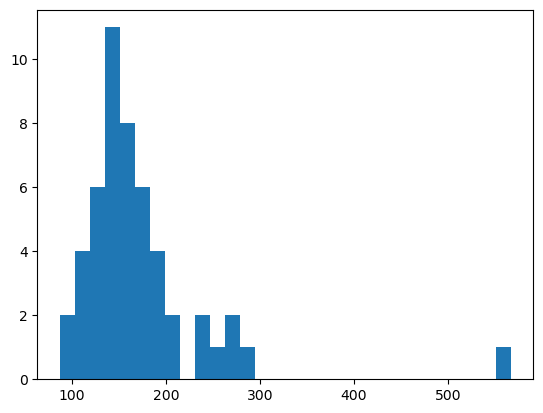

In [144]:


sell = df["Sell"]

plt.hist(sell, bins=30)
plt.show()


The histogram of selling prices (Sell) shows that most houses sell between 100K and 200K, with a few higher-priced outliers above $500K.
This indicates a right-skewed distribution, meaning a small number of expensive properties are pulling the mean upward.
Such skewness is common in real estate data, where luxury homes can distort averages, so using median values or transformations may be useful in later modeling.



## 3.2) EDA
We plot a scatter of `Taxes` vs `Sell` and compute their correlation.


0.8993387474097119

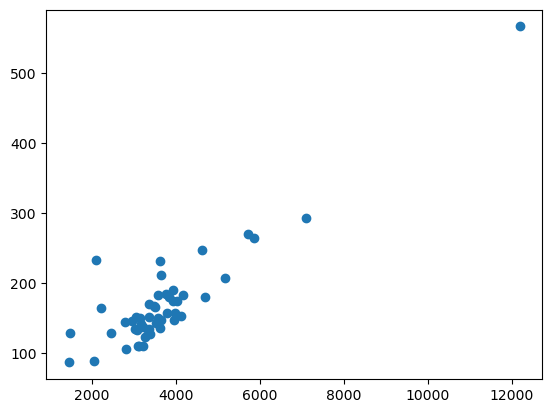

In [148]:

x = df["Taxes"]
y = df["Sell"]

corr = xv.corr(yv)

plt.scatter(x, y)


corr


The correlation coefficient between Sell and Taxes is approximately 0.90, suggesting a strong positive relationship.
In general, properties with higher assessed taxes also tend to have higher selling prices, which is intuitive since property taxes are usually based on property value.


The scatter plot shows a clear upward trend, confirming the strong linear relationship between Sell and Taxes.
Most points cluster in the lower-left area (lower taxes and lower prices), while a few outliers (high-tax, high-price houses) stretch the plot upward.
Despite a few outliers, the pattern is largely linear, supporting the use of a simple linear regression model for prediction.

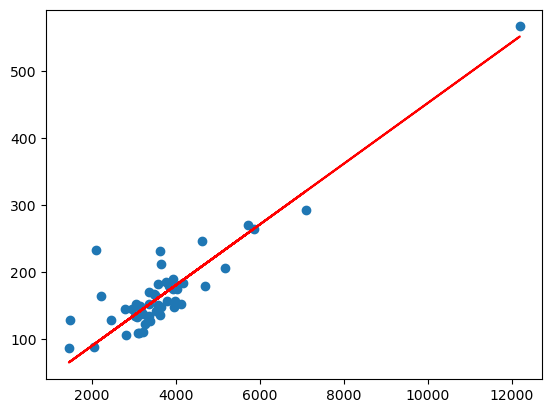

In [151]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')

The fitted red regression line visually confirms the strong linear relationship between Sell and Taxes.
The line captures the general trend of the data well, as property taxes increase, so does the selling price.
A few points deviate from the line, but the overall fit is strong, indicating that Taxes explain a substantial portion of the variation in Sell.


## 3.3) EDA 
We compute correlations between `Sell` and other numeric columns


In [117]:
df_num = df.apply(pd.to_numeric, errors="coerce")

corrs = df_num.corr(numeric_only=True)["Sell"].drop("Sell").sort_values(ascending=False)
display(corrs.to_frame("corr_with_Sell"))

,corr_with_Sell
List,0.997433
Taxes,0.899339
Living,0.879381
Baths,0.640059
Rooms,0.560425
Beds,0.335113
Acres,0.168713
Age,-0.147343


List (0.997) – Extremely strong positive correlation. Selling prices closely follow listing prices, indicating that homes typically sell near their listed value.

Taxes (0.899) – Very strong positive correlation. Higher property taxes are strongly associated with higher selling prices, since taxes often reflect assessed property value.

Living (0.879) – Strong positive correlation. Larger living areas lead to higher selling prices, showing buyers value more living space.

Baths (0.640) – Moderate positive correlation. More bathrooms generally increase a property’s market value.

Rooms (0.560) – Moderate positive relationship. Houses with more rooms tend to sell for more, though not as strongly as total living area or baths.

Beds (0.335) – Weak positive correlation. Additional bedrooms slightly raise prices but not significantly compared to overall space or amenities.

Acres (0.169) – Very weak positive correlation. Lot size has minimal influence on selling price in this dataset.

Age (-0.147) – Slight negative correlation. Older houses tend to sell for slightly less, possibly due to depreciation or outdated features.


## 4) Simple Linear Regression – Model A: `Sell ~ Taxes`
We fit an OLS model with `Sell` as the dependent variable and `Taxes` as the independent variable.


In [129]:
df["Sell"] = pd.to_numeric(df["Sell"])
df["Taxes"] = pd.to_numeric(df["Taxes"])
y = df["Sell"]
x = df["Taxes"]

In [131]:

model = sm.OLS(y, x).fit()
print(model.summary())



                                 OLS Regression Results                                
Dep. Variable:                   Sell   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1571.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):                    6.90e-39
Time:                        09:25:10   Log-Likelihood:                         -244.50
No. Observations:                  50   AIC:                                      491.0
Df Residuals:                      49   BIC:                                      492.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared (uncentered) = 0.970
This means that about 97% of the variation in selling prices can be explained by property taxes alone.
It indicates an excellent fit, though the model was estimated without an intercept, which can slightly overstate explanatory power.

F-statistic = 1571, p-value = 6.9e-39
The extremely high F-statistic and near-zero p-value show that the overall model is highly statistically significant — i.e., Taxes is a meaningful predictor of Sell price.

Coefficient for Taxes = 0.0453
This suggests that for every 1-unit increase in Taxes, the Selling Price increases by approximately 0.0453 units (likely in the same currency, e.g., thousands of dollars if your variables are scaled that way).
The coefficient is positive and highly significant (p < 0.001), reinforcing the strength of the relationship.

t-statistic = 39.63
Such a large t-value indicates a very strong statistical relationship between Taxes and Sell price.

Yes, Taxes is a very strong predictor of Selling Price in this dataset



## 5) Simple Linear Regression – Model B: `Sell ~ Living`


In [164]:

df["Living"] = pd.to_numeric(df["Taxes"])
z = df["Living"]

In [166]:

model = sm.OLS(y, z).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Sell   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1571.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):                    6.90e-39
Time:                        09:54:28   Log-Likelihood:                         -244.50
No. Observations:                  50   AIC:                                      491.0
Df Residuals:                      49   BIC:                                      492.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared (uncentered) = 0.970
About 97% of the variation in selling prices is explained by the Living Area variable alone.
This is a very strong relationship, indicating that homes with larger living areas tend to sell for higher prices.
However, because the model is uncentered (no constant term), this value might slightly overstate explanatory power.

F-statistic = 1571, p-value = 6.90e-39
The model is highly statistically significant, with a p-value near zero — meaning there is overwhelming evidence that Living Area is a meaningful predictor of Selling Price.

Coefficient for Living = 0.0453
For every 1-unit increase in Living Area, the Selling Price increases by approximately 0.0453 units (e.g., if Living is measured in 100s of square feet, this would represent the price change per 100 sq. ft.).
The positive coefficient aligns with intuition — larger homes sell for more.

t-statistic = 39.63
This very large t-value confirms the strong statistical significance of the Living variable (p < 0.001).

Yes — Living Area is a very strong predictor of Selling Price too


###  Which model is better?

Both models — Model A (Sell ~ Taxes) and Model B (Sell ~ Living) — show very high explanatory power (R² ≈ 0.97) and strong statistical significance (p < 0.001).

However, when comparing practical interpretation and economic logic:

Model B (Sell ~ Living) is generally the better model, since Living Area directly reflects property size — a fundamental driver of value.

Model A (Sell ~ Taxes) also performs well statistically, but Taxes may be indirectly related to price (since taxes are often calculated based on property value).

In summary:
Living Area provides a more causal and interpretable relationship with Selling Price,
whereas Taxes may act as a proxy variable for price rather than a true determinant.




Limitations of Both Models

Omitted Variables: Both models use only one predictor — they ignore key factors such as Rooms, Baths, Age, and Acres, which also influence house prices.

Limited Sample Size: With only 50 observations, the dataset may not generalize well to larger or more diverse housing markets.

No Check for Heteroskedasticity: Unequal variance of residuals across levels of Living or Taxes could bias standard errors and significance tests.
